## Tarea 3 Tratamiento de datos faltantes


#### Importacion de las librerias requeridas

In [44]:
from sklearn.impute import SimpleImputer
from feature_engine.imputation import RandomSampleImputer
import pandas as pd


#### Carga de los datos a un data frame

Se presentan las primeras 5 filas de nuestro dataset

Con la funcion info y las primeras 5 filas observamos que tenemos una variable categorica de las 4

In [45]:
data = pd.read_csv("https://raw.githubusercontent.com/isaacGGomez/Ing_Caract/master/tratamiento_de_valores_faltantes.csv",sep = ",")
data.head()

,x1,x2,x3,x4
0,1.307150,Comida rápida,5.249548,2.790293
1,18.422083,Mexicano,5.278007,3.330853
2,7.729605,Italiano,7.403145,2.895753
3,10.599776,Comida rápida,7.209577,3.393178
4,5.612505,Chino,5.896599,2.901199


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      482 non-null    float64
 1   x2      480 non-null    object 
 2   x3      486 non-null    float64
 3   x4      483 non-null    float64
dtypes: float64(3), object(1)
memory usage: 15.8+ KB


#### Porcentaje de valores faltantes por columna

Se presenta el % de datos faltantes por columna, mismos que son relativamente bajos por lo cual no se descartara ninguna columna

In [46]:
dataNA = data.isna()
dataNA.head()
GroupNA = dataNA.sum()
sizedf = len(dataNA)
(GroupNA/sizedf)*100

x1    3.6
x2    4.0
x3    2.8
x4    3.4
dtype: float64

#### Exploracion de los datos

Mediante las graficas de histogramas se puede observar a grandes rasgos las distribuciones que tienen los datos numericos

La variable x1 presenta una distribucion similar a la normal, sin embargo parece presentar datos atipicos

La variable x3 presenta una distribucion muy similar a la uniforme, mismo que se valida con la curtosis que esta alrededor de -1.2

La variable x4 tambien presenta una distribucion similar a la normal y sin datos atipicos



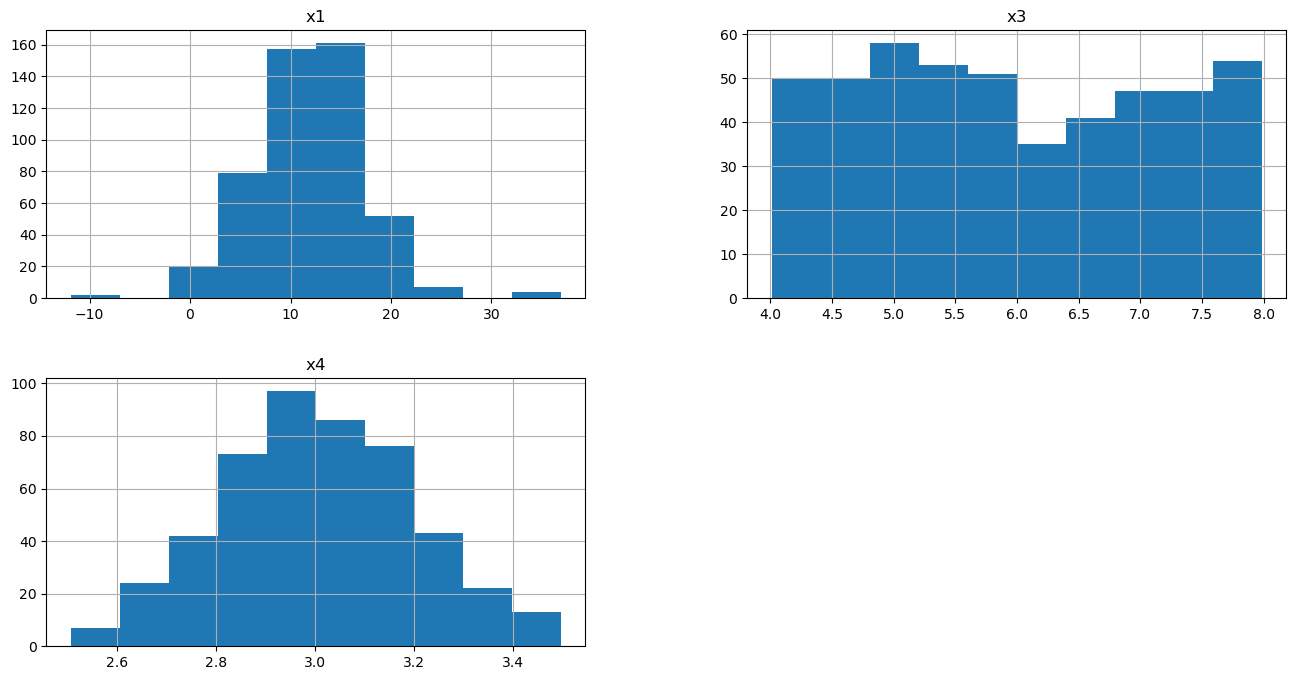

In [5]:
plots = data.hist(figsize=(16,8))

In [17]:
data.drop(['x2'],axis = 1).kurt()

x1    3.157644
x3   -1.260308
x4   -0.290781
dtype: float64

Para el caso de la variable x1 se hace un diagrama de caja y bigotes donse si se observan los datos atipicos

<AxesSubplot:>

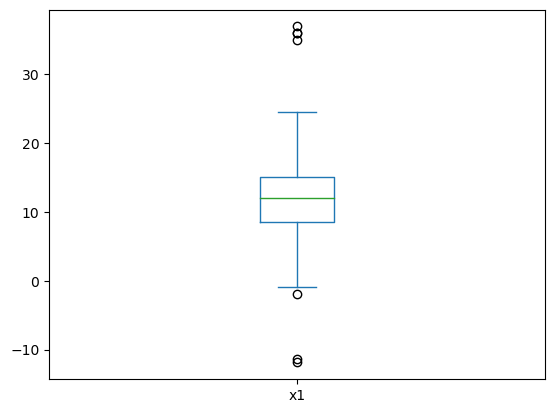

In [21]:
data['x1'].plot(kind = 'box')

Para el caso de la variable x2 al ser categorica se hace una grafica de barras donde es sencillo observar el valor que mas se repite

<AxesSubplot:>

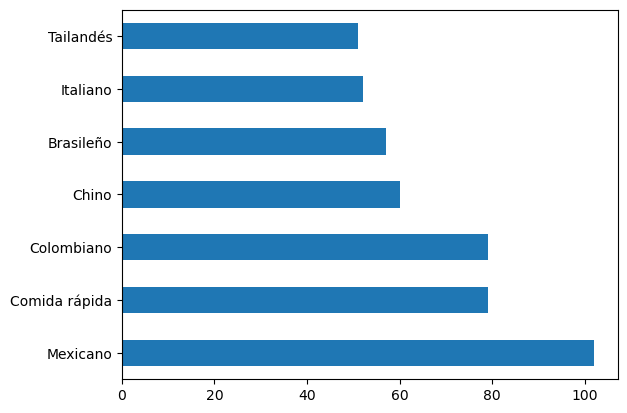

In [13]:
data['x2'].value_counts().plot(kind='barh')

#### Tratamiento de los datos

Con base a lo anterior se realizara el tratamiento de la siguiente manera

x1: Imputacion mediante la mediana

x2: Imputacion mediante la moda

x3: Imputacion mediante sustitucion aleatoria

x4: Imputacion mediante la media aritmetica

In [42]:
data['x1'] = SimpleImputer(strategy='median').fit_transform(data['x1'].to_numpy().reshape(-1,1))
data['x2'] = SimpleImputer(strategy='most_frequent').fit_transform(data['x2'].to_numpy().reshape(-1,1))
data['x3'] = RandomSampleImputer().fit_transform(data['x3'].to_numpy().reshape(-1,1))
data['x4'] = SimpleImputer().fit_transform(data['x4'].to_numpy().reshape(-1,1))


Tras la sustitucion de valores faltantes se valida que la transformacion se haya realizado de forma correcta

In [43]:
data.isna().sum()

x1    0
x2    0
x3    0
x4    0
dtype: int64